In [32]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [33]:
data_train =  pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-train.csv')
data_test = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-test.csv')


In [34]:
data_train.set_index('V1', inplace=True)
data_test.set_index('V1', inplace=True)

In [35]:
data_train = data_train.iloc[4223]
data_test = data_test.iloc[4223]
data_train = data_train.dropna()  # drop null values
data_test = data_test.dropna()
data_train = data_train.to_frame()
data_test = data_test.to_frame()

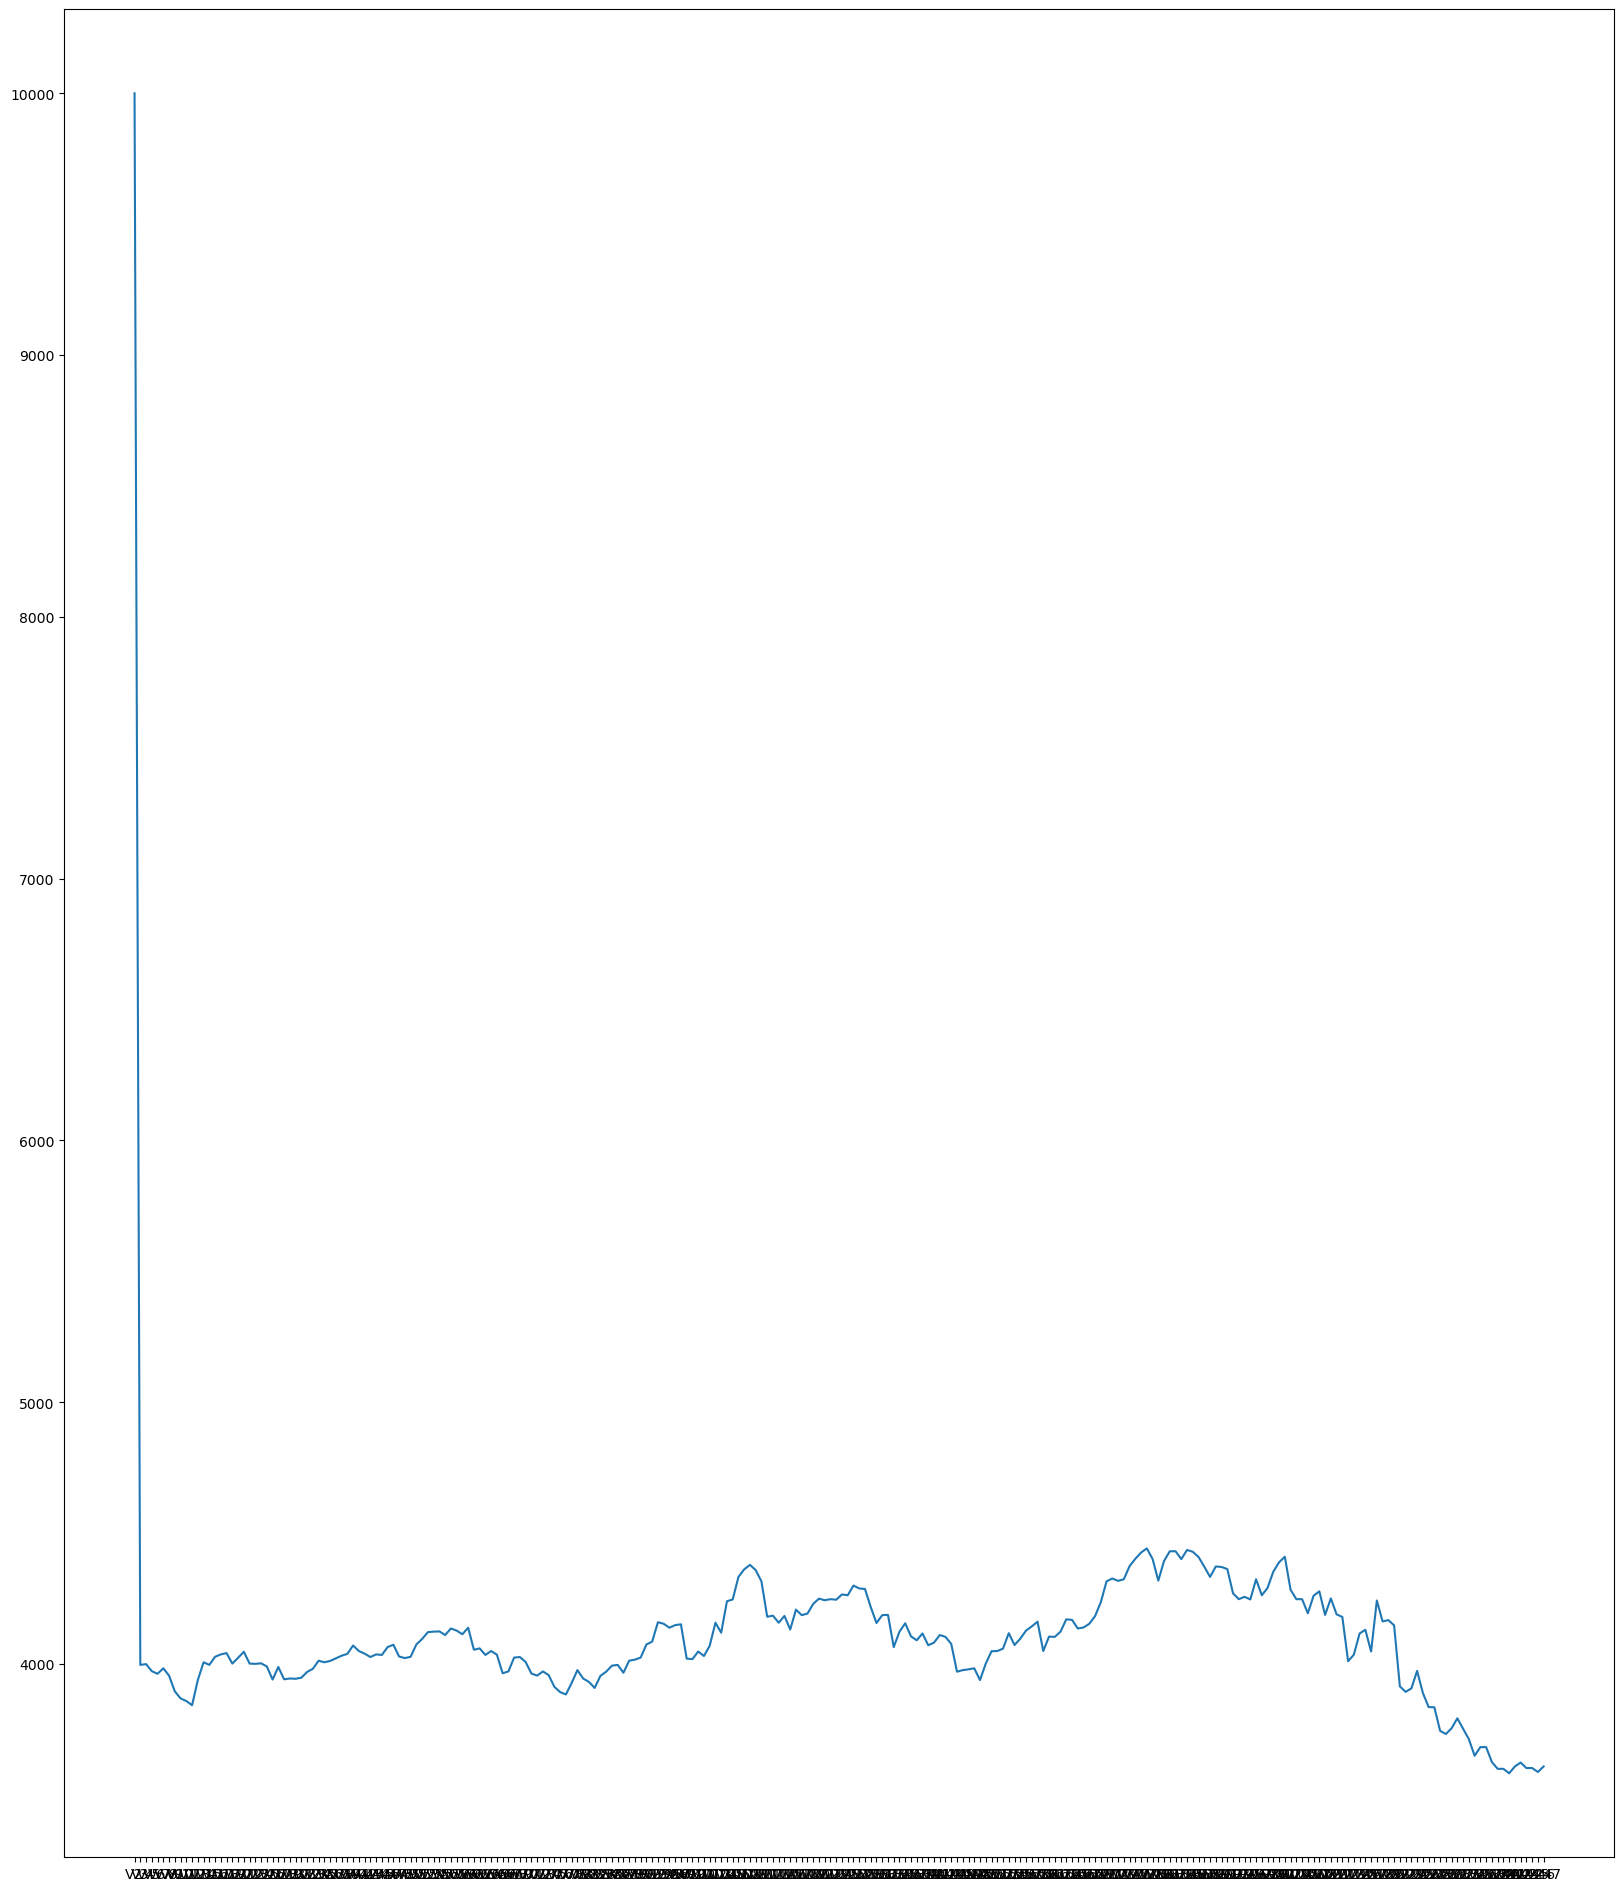

In [36]:
plt.plot(data_train)

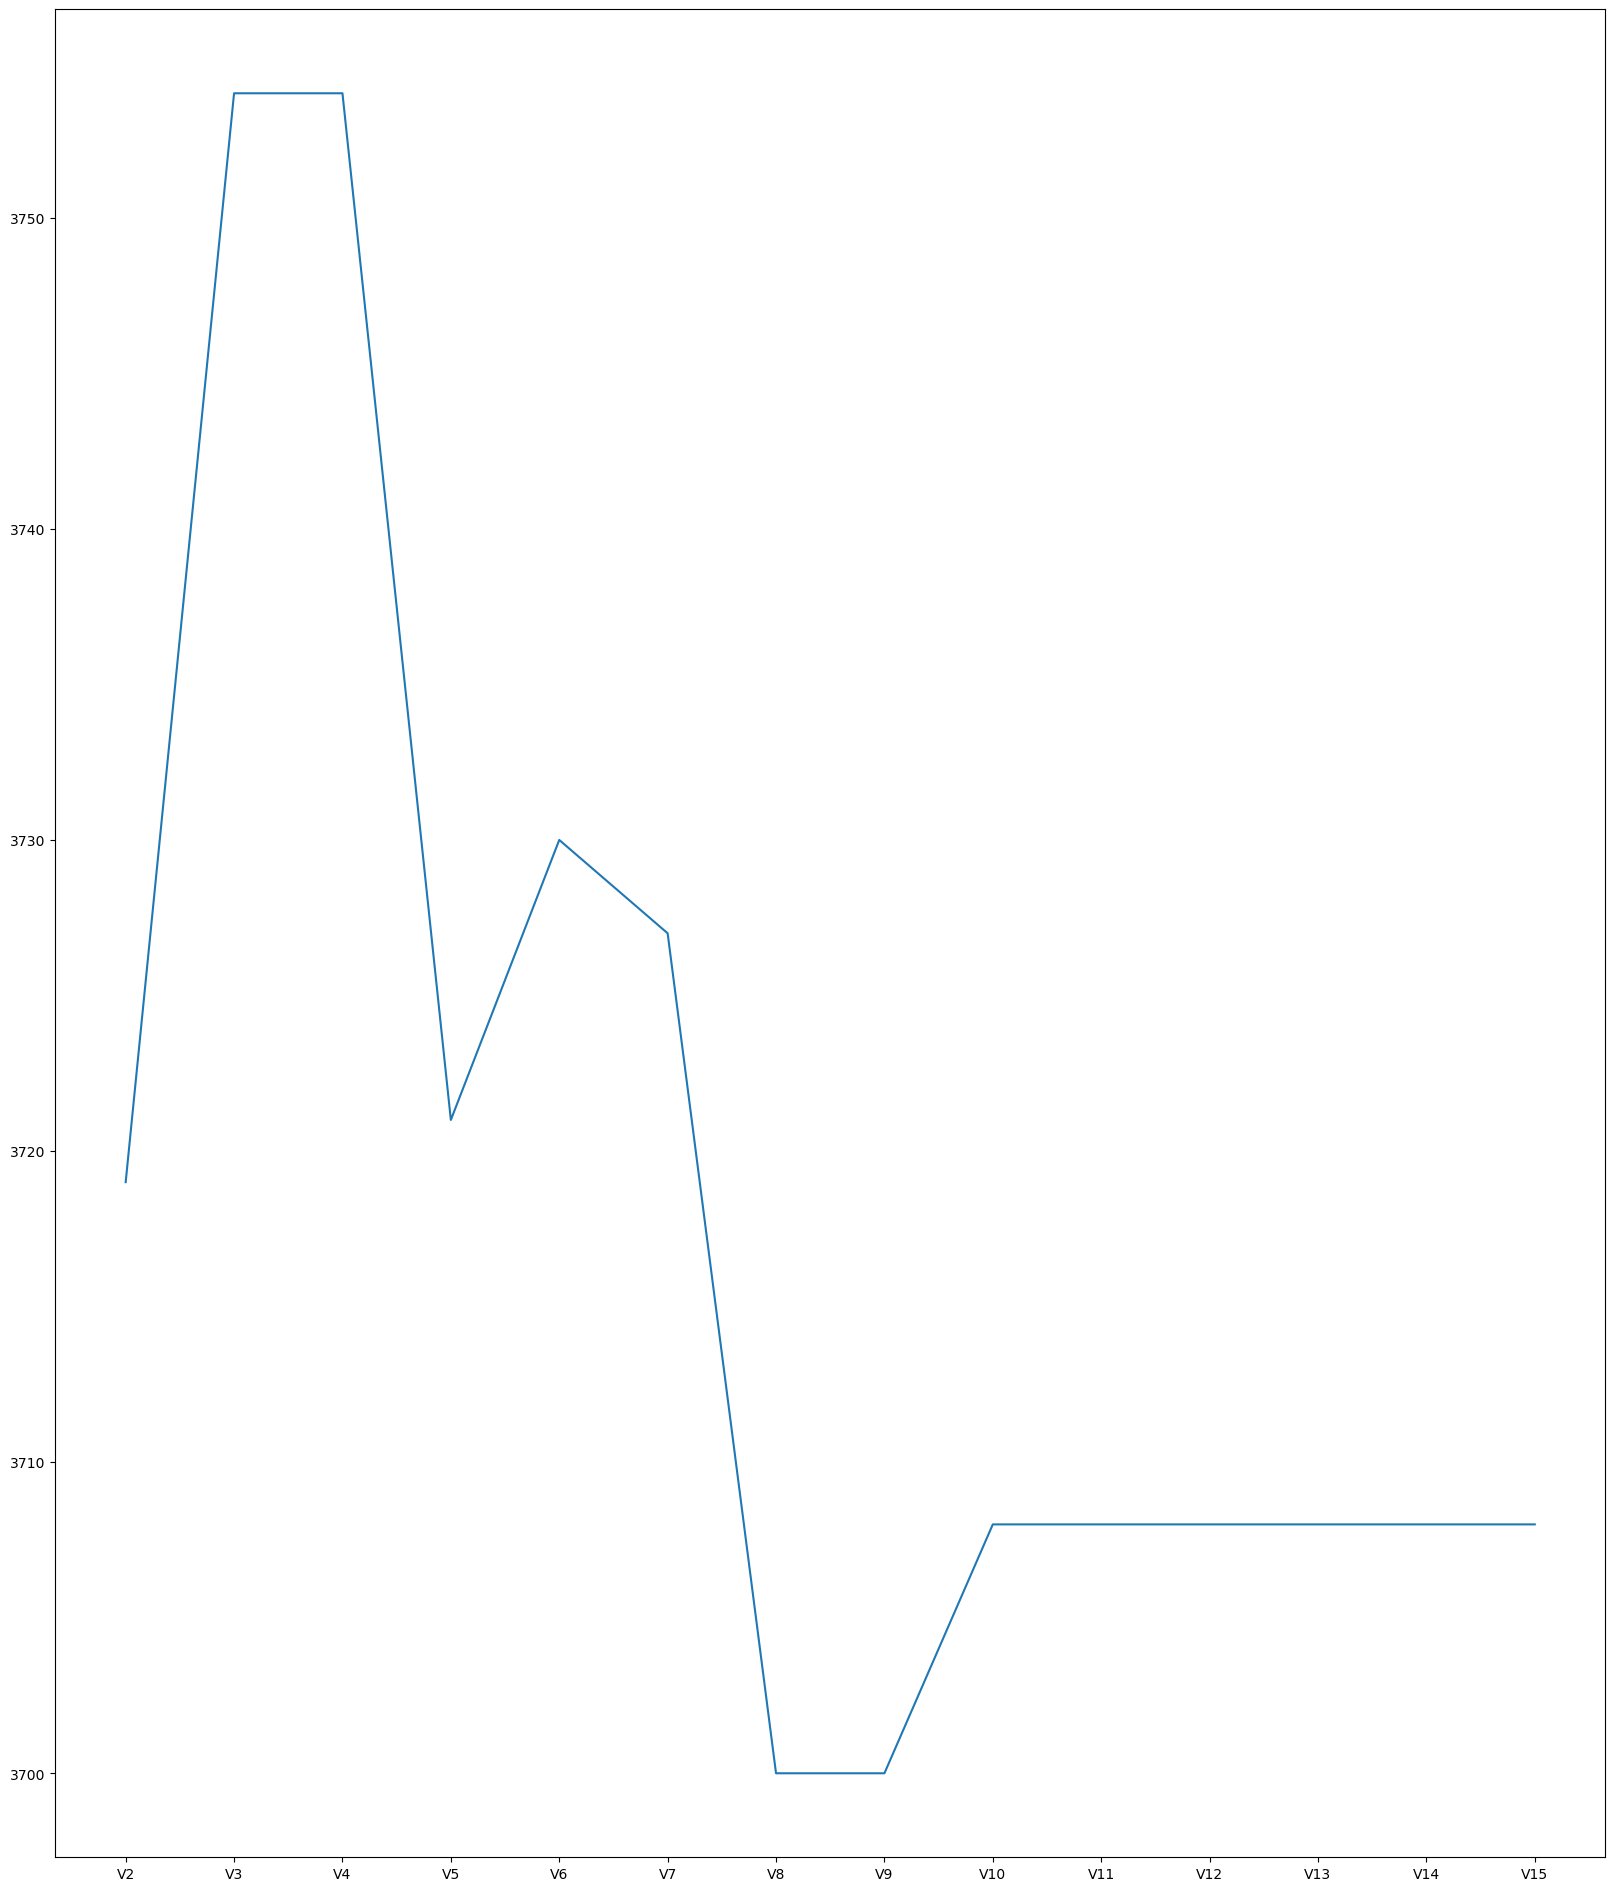

In [37]:
plt.plot(data_test)

In [38]:
data_train.reset_index(inplace=True)

In [39]:
data_train = data_train.rename(columns= {'index':'dates'})


In [40]:
dates = pd.date_range(start='2028-07-16', periods=len(data_train), freq='D')


In [41]:
data_train['dates'] = dates


In [42]:
data_train.set_index('dates',inplace=True)


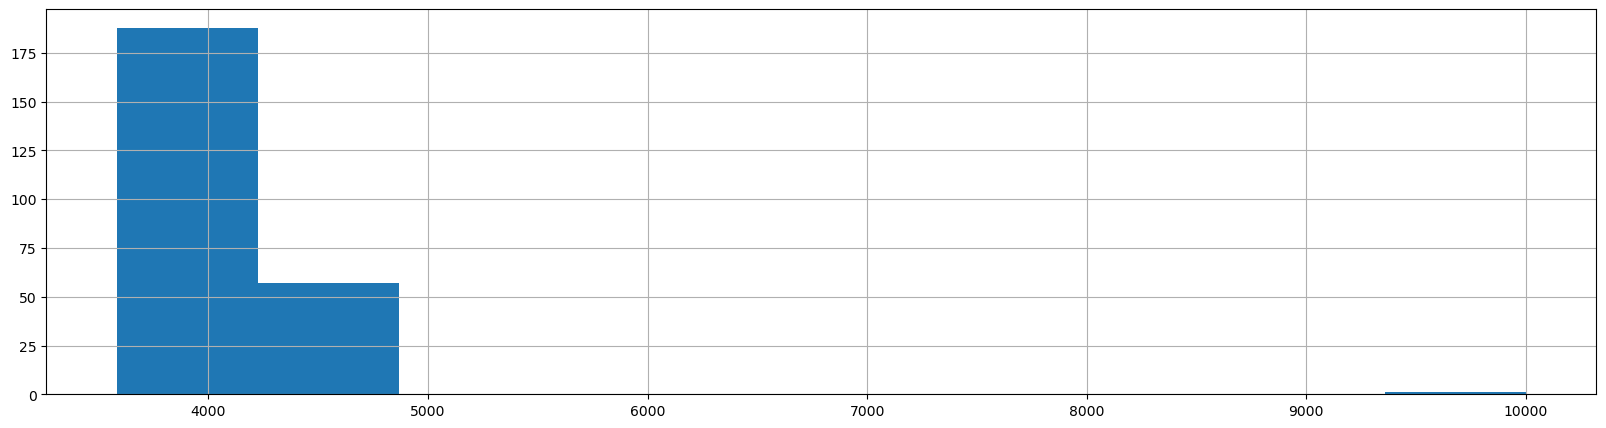

In [43]:
fig = data_train.D4224.hist(figsize = (20,5))


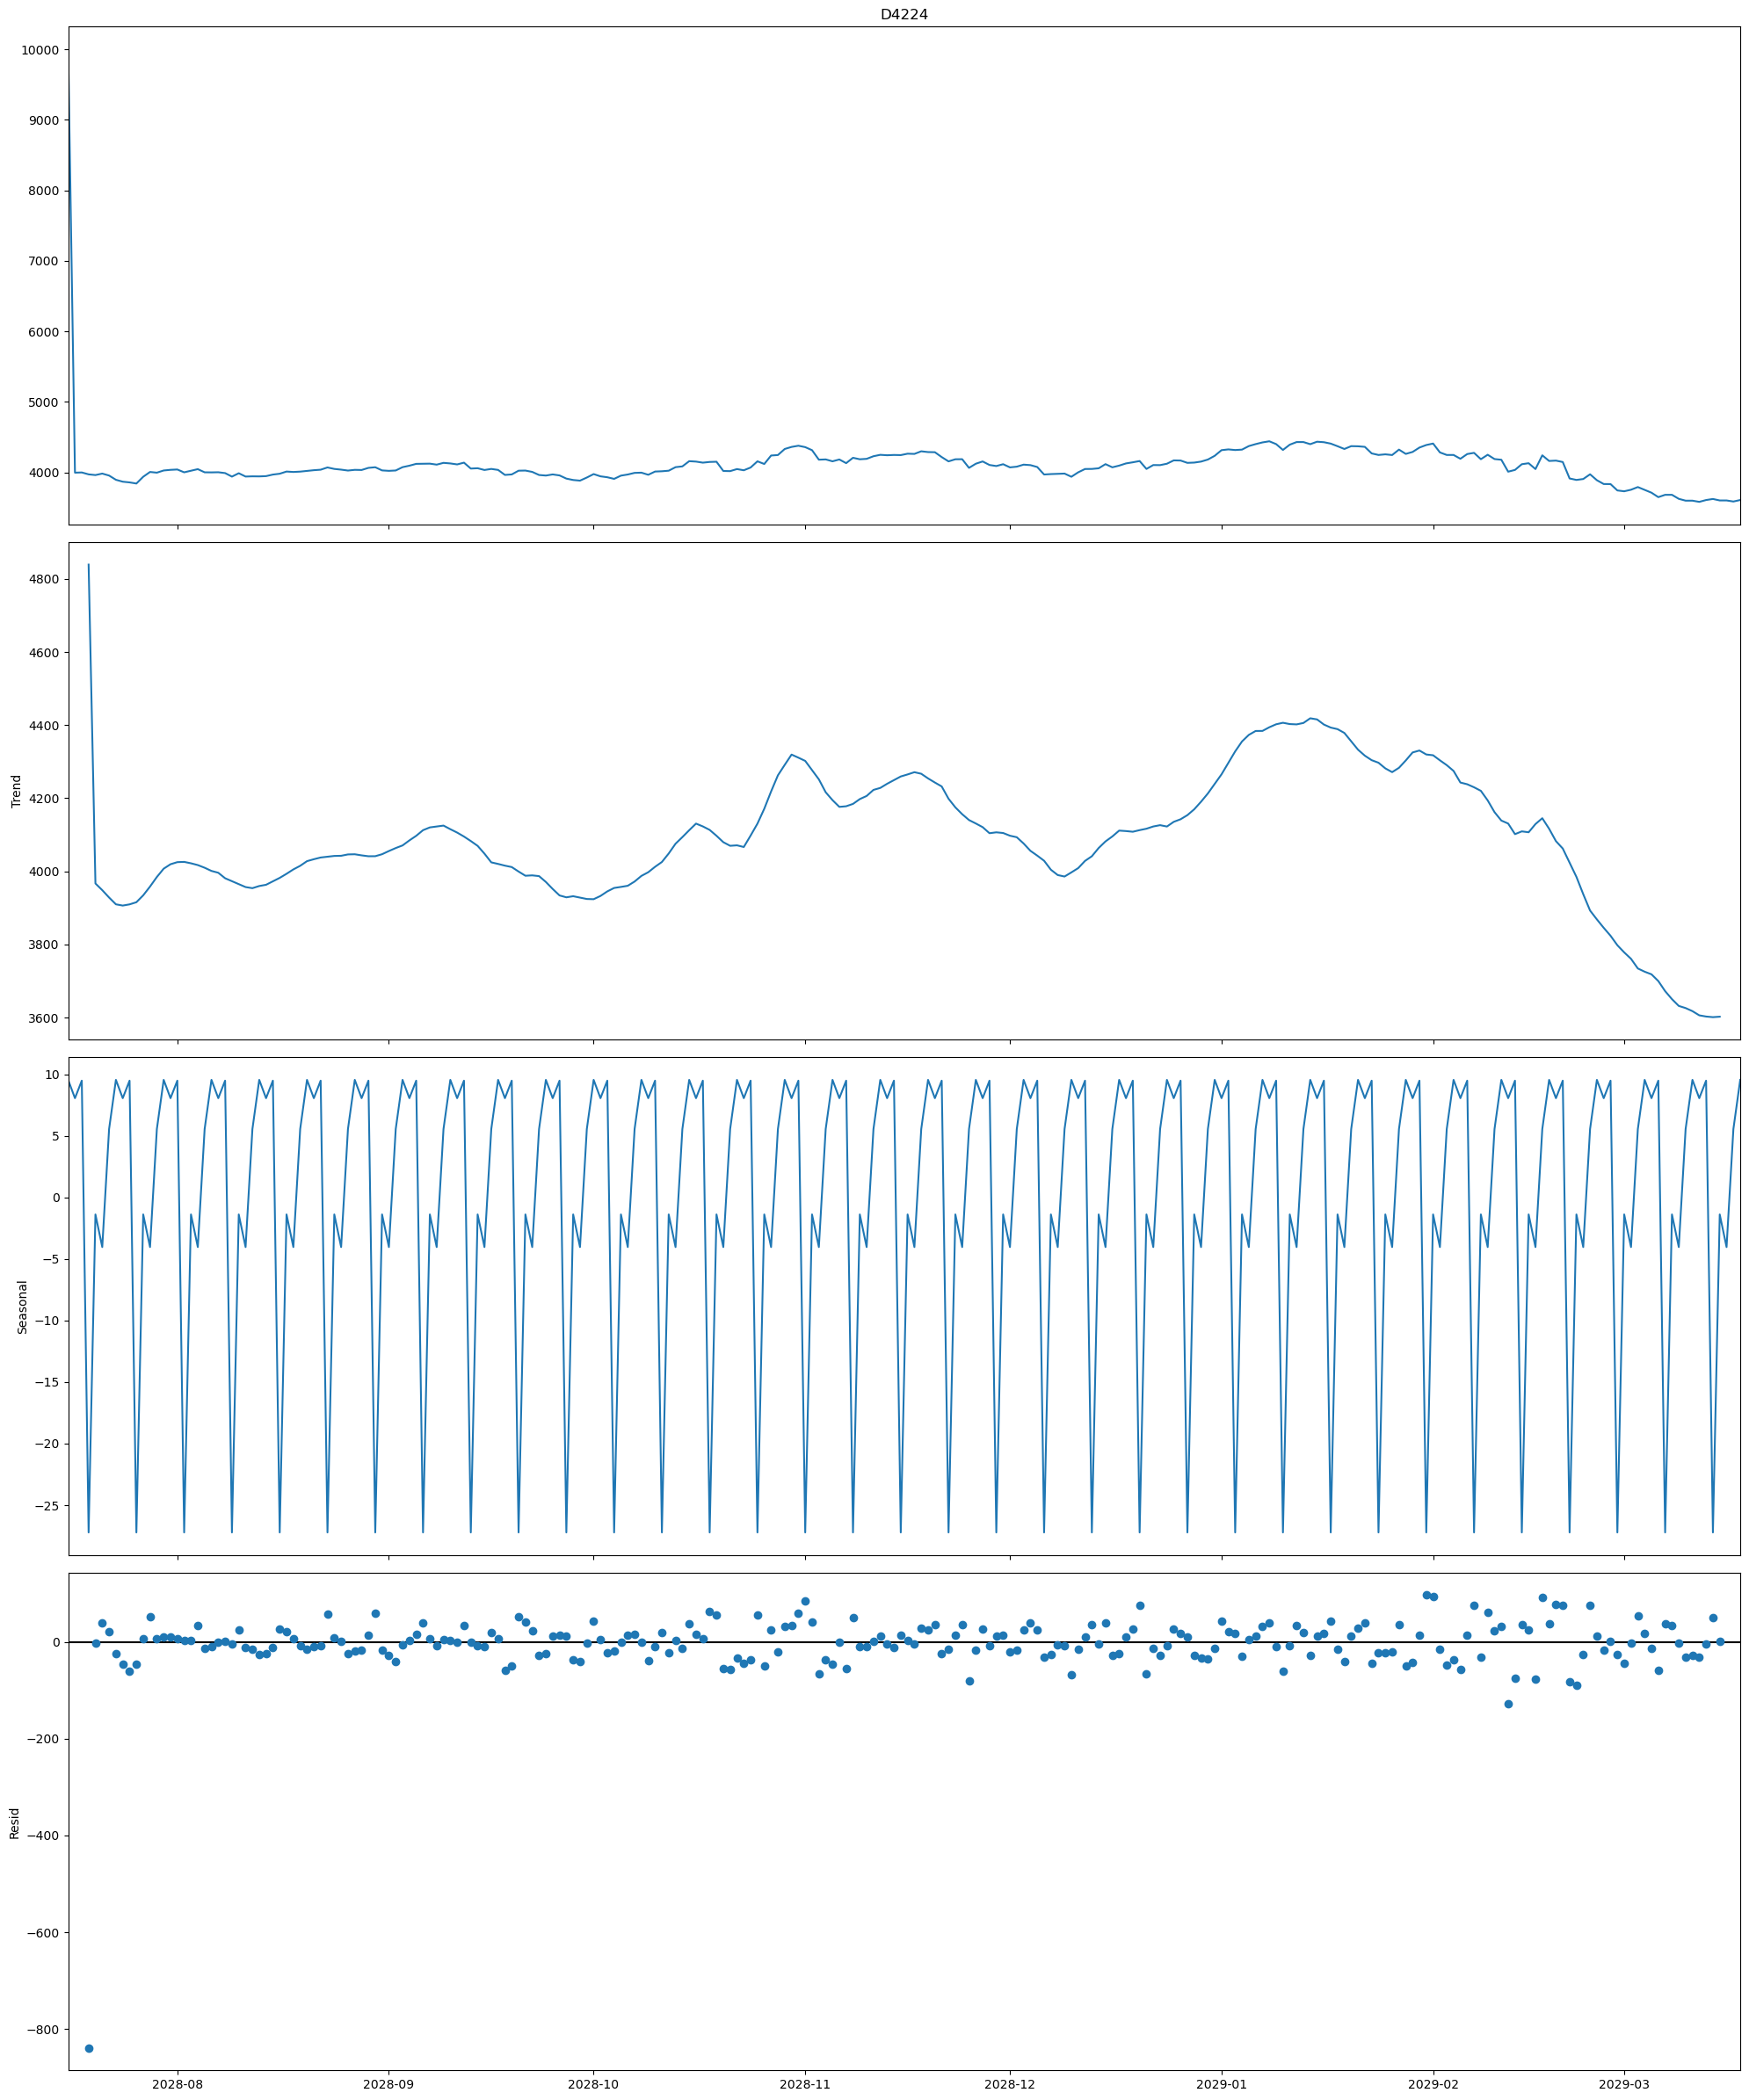

In [44]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(data_train.D4224, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

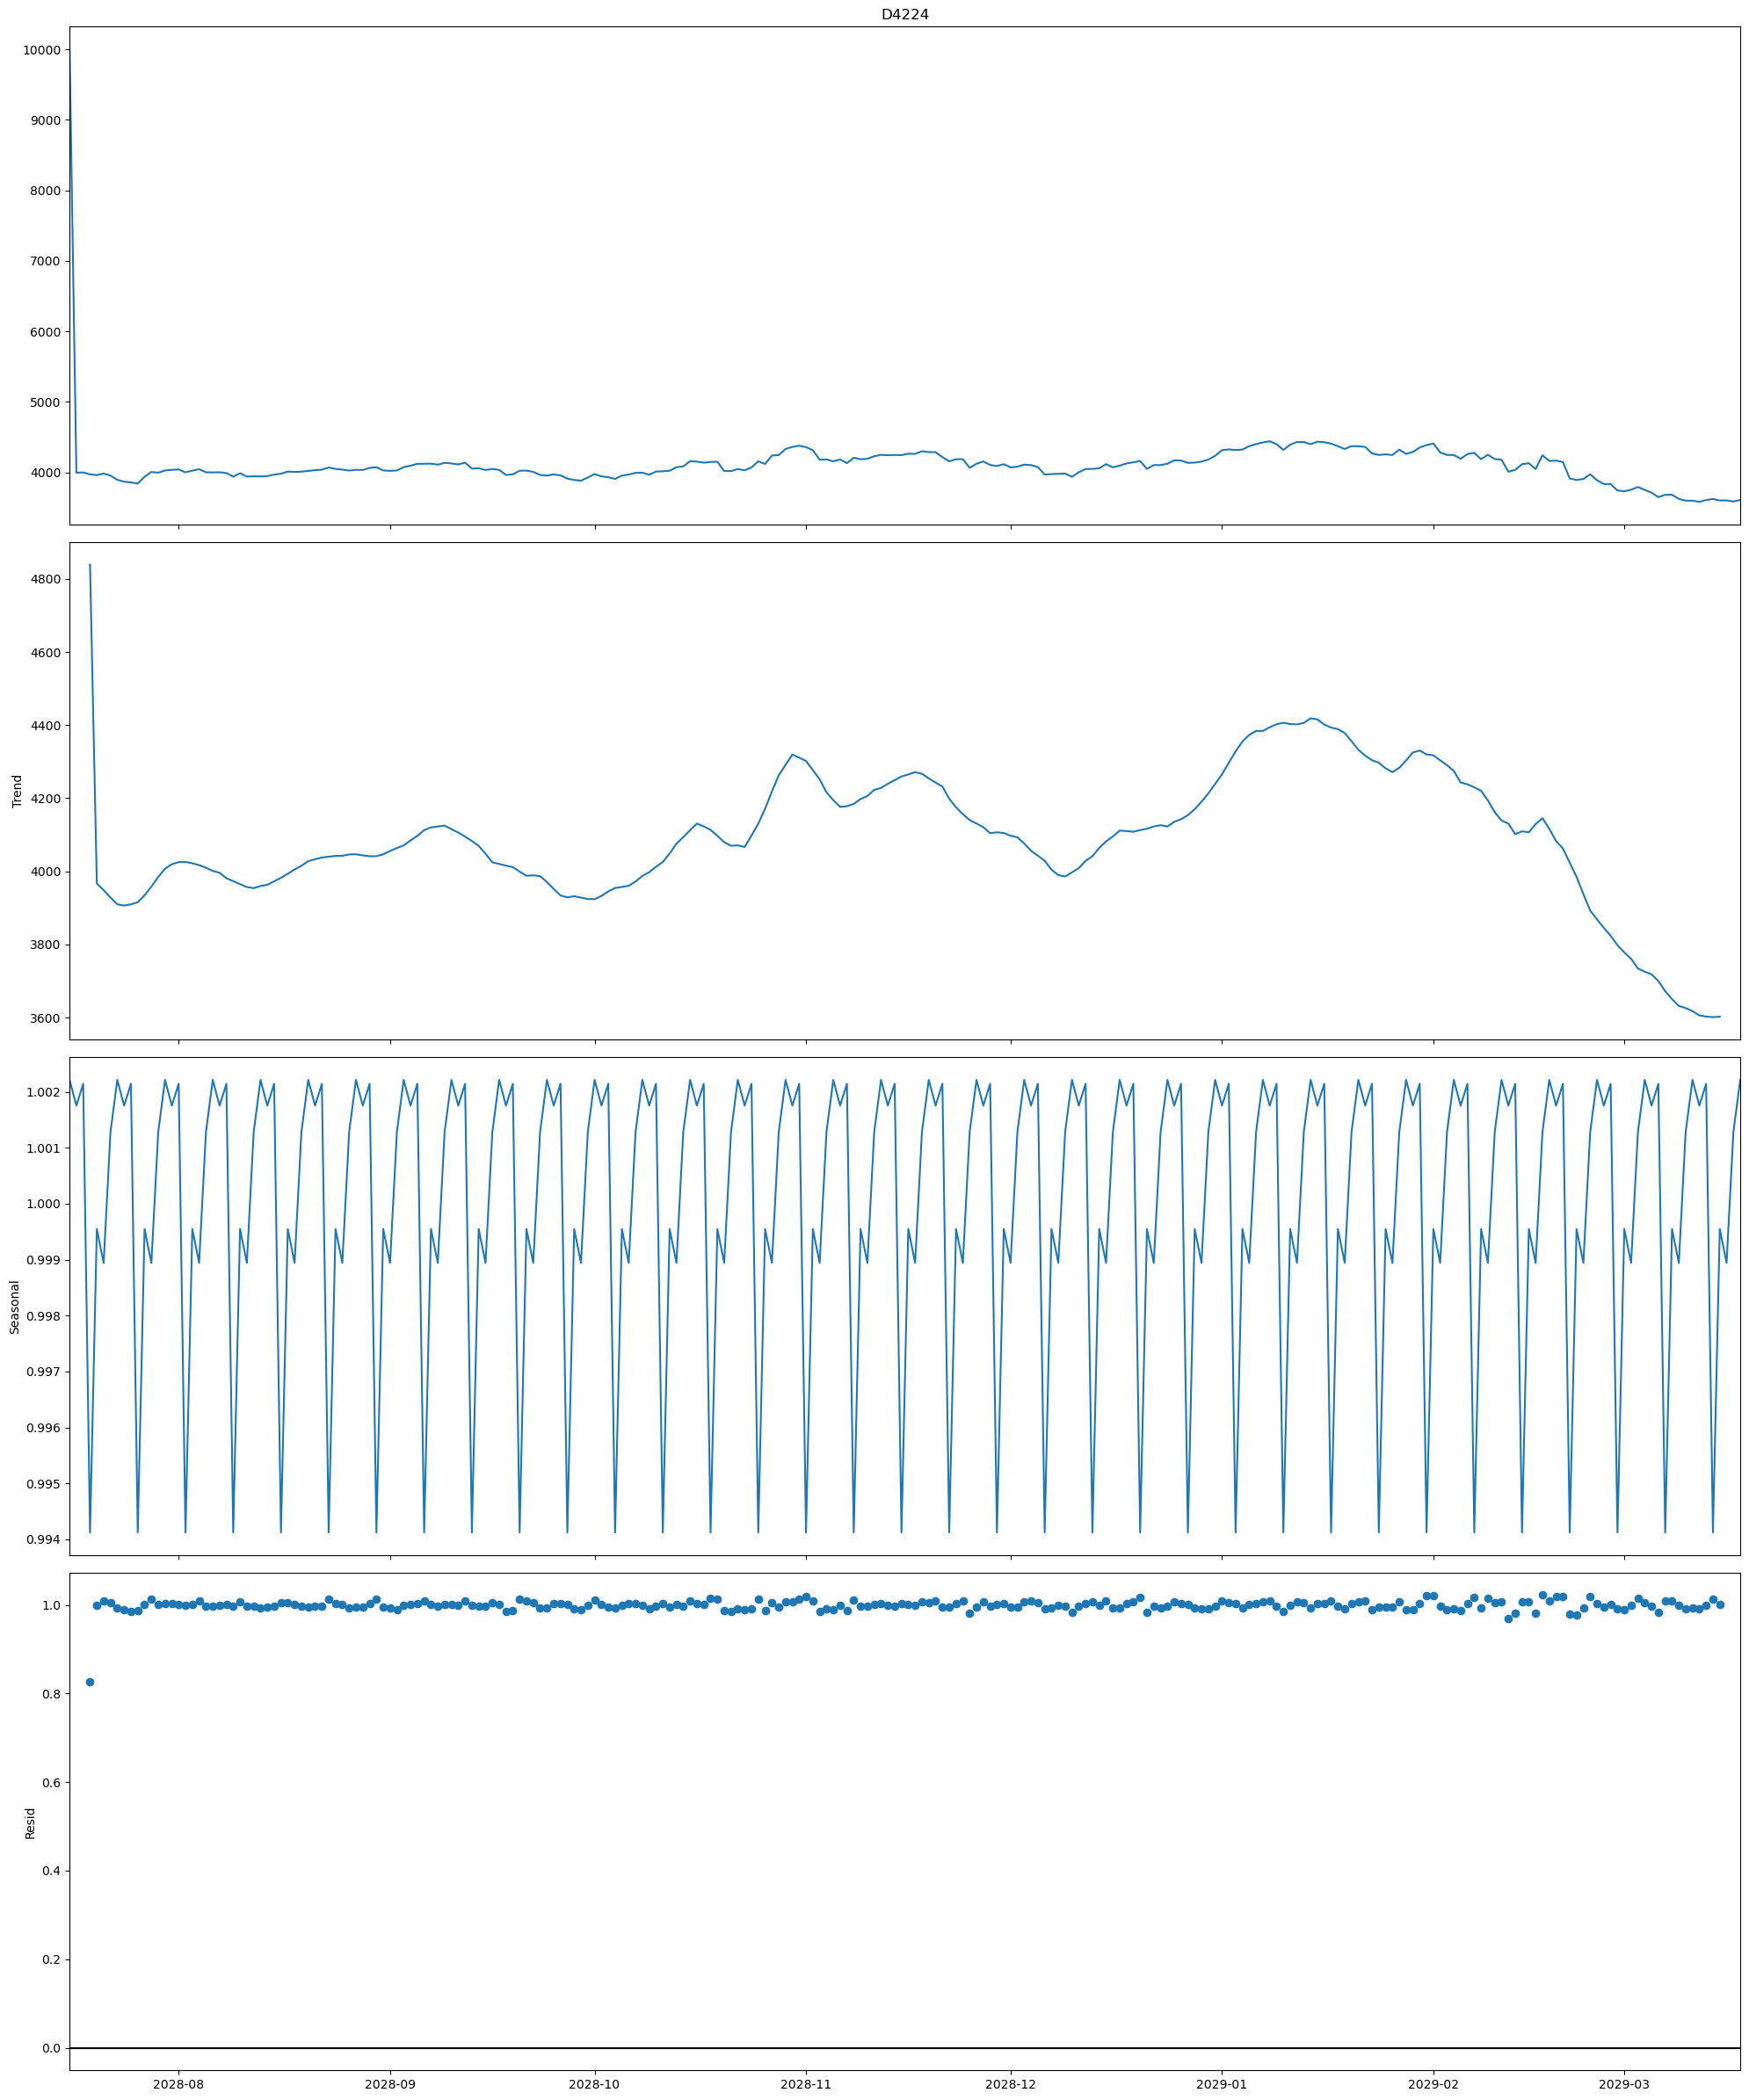

In [45]:
decomposition = sm.tsa.seasonal_decompose(data_train.D4224, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()



In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf

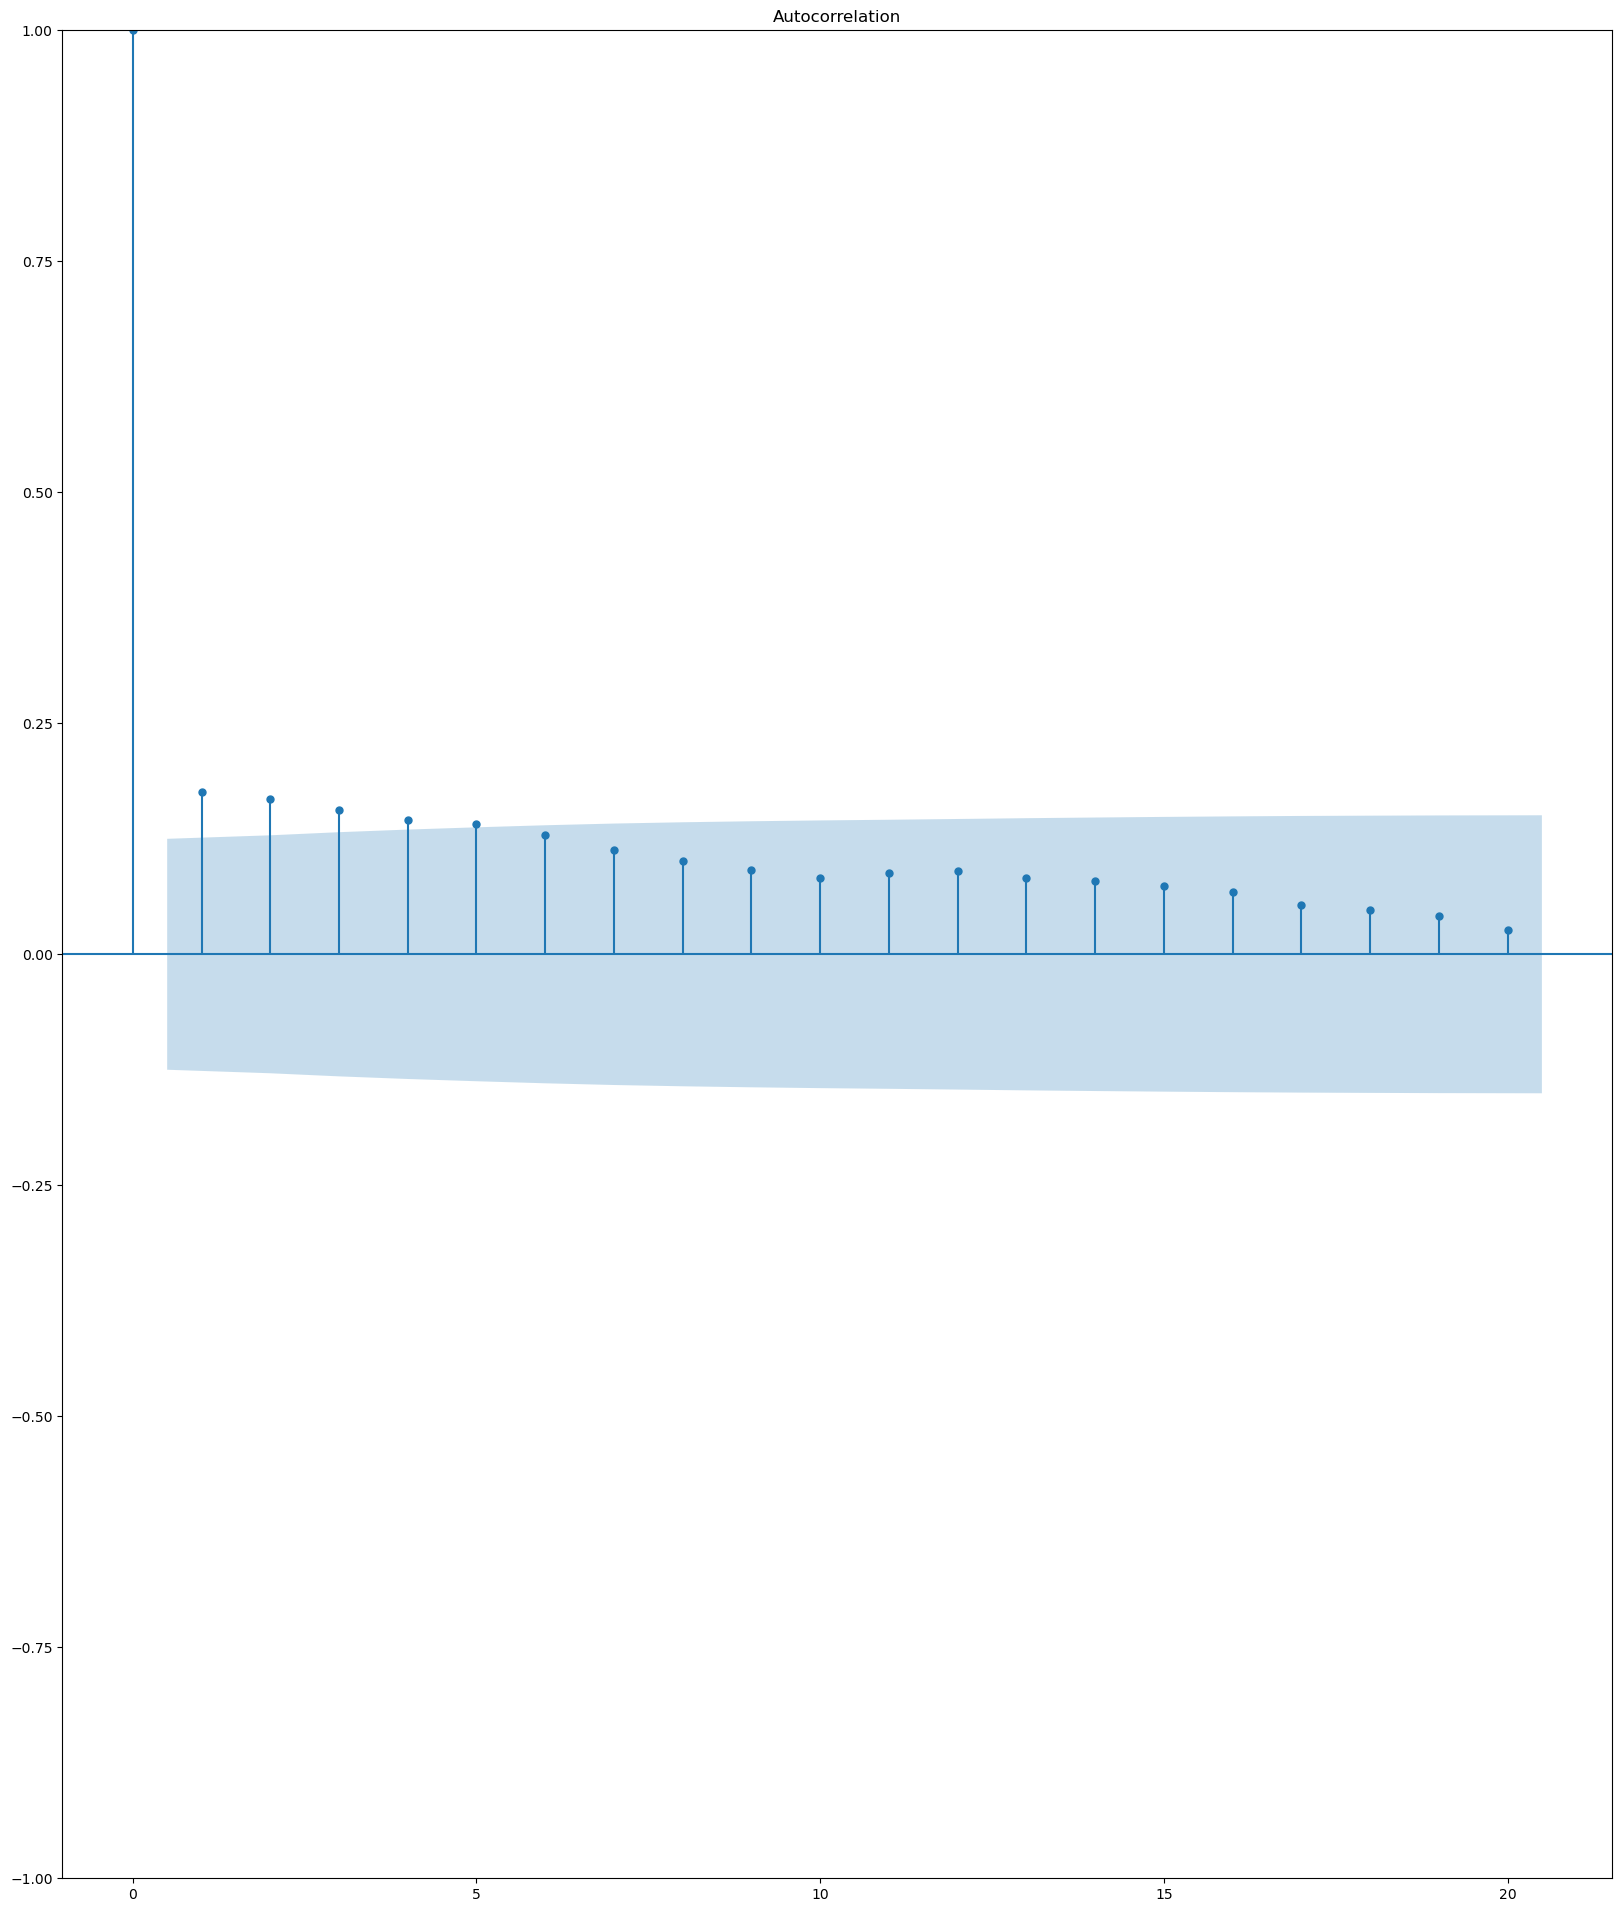

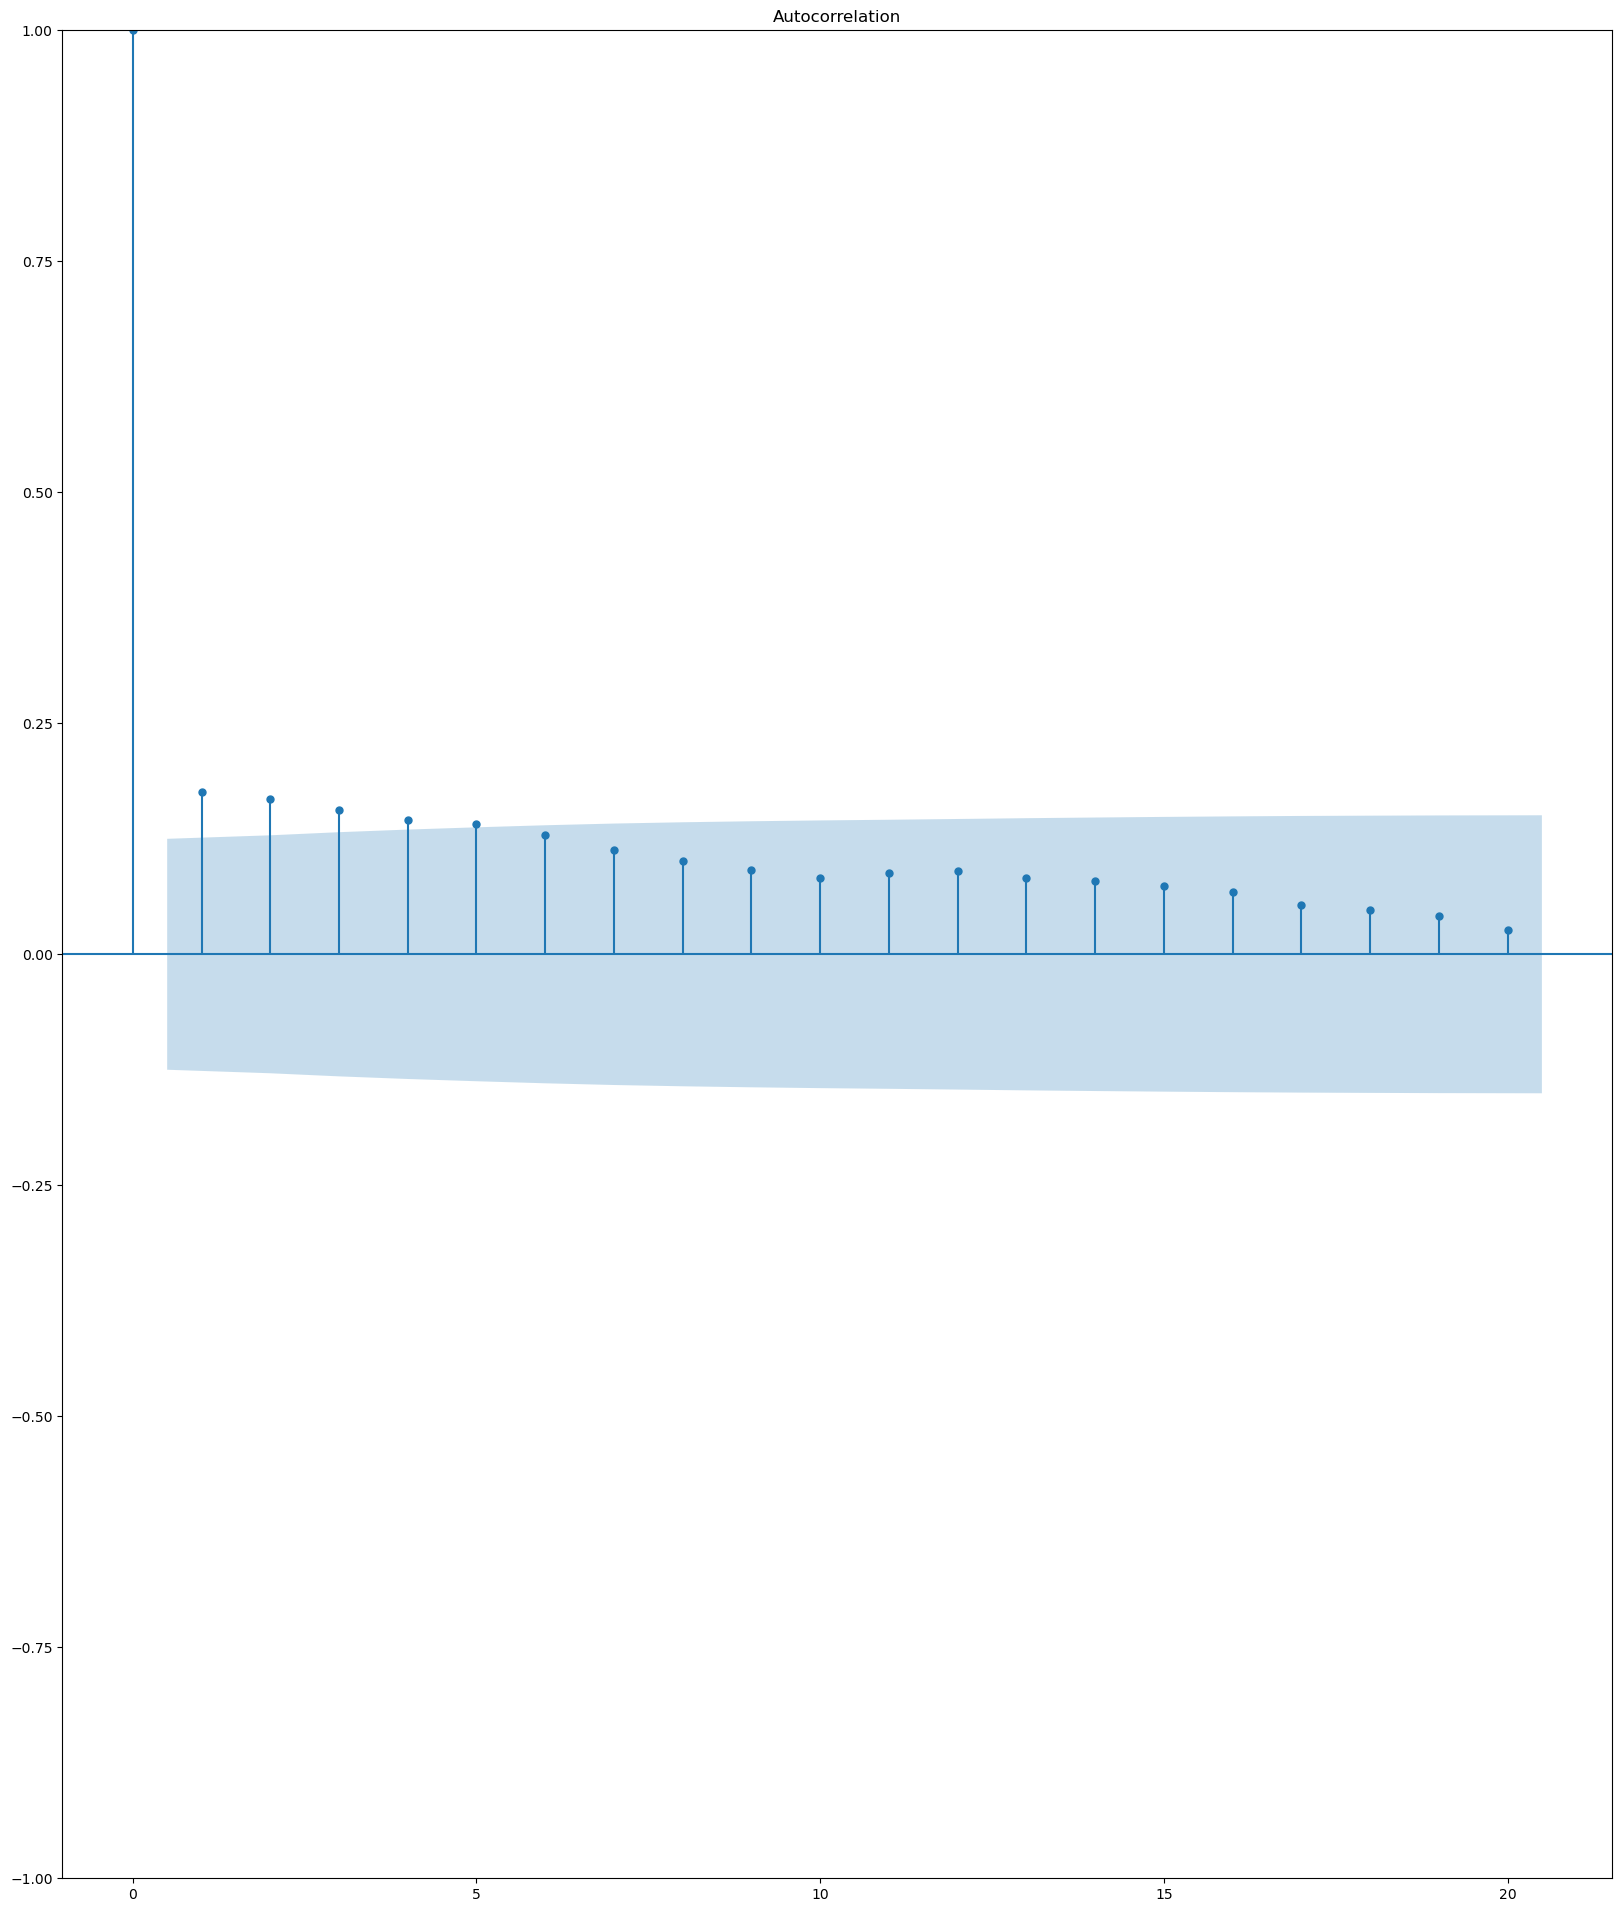

In [47]:
plot_acf(data_train,lags = 20)

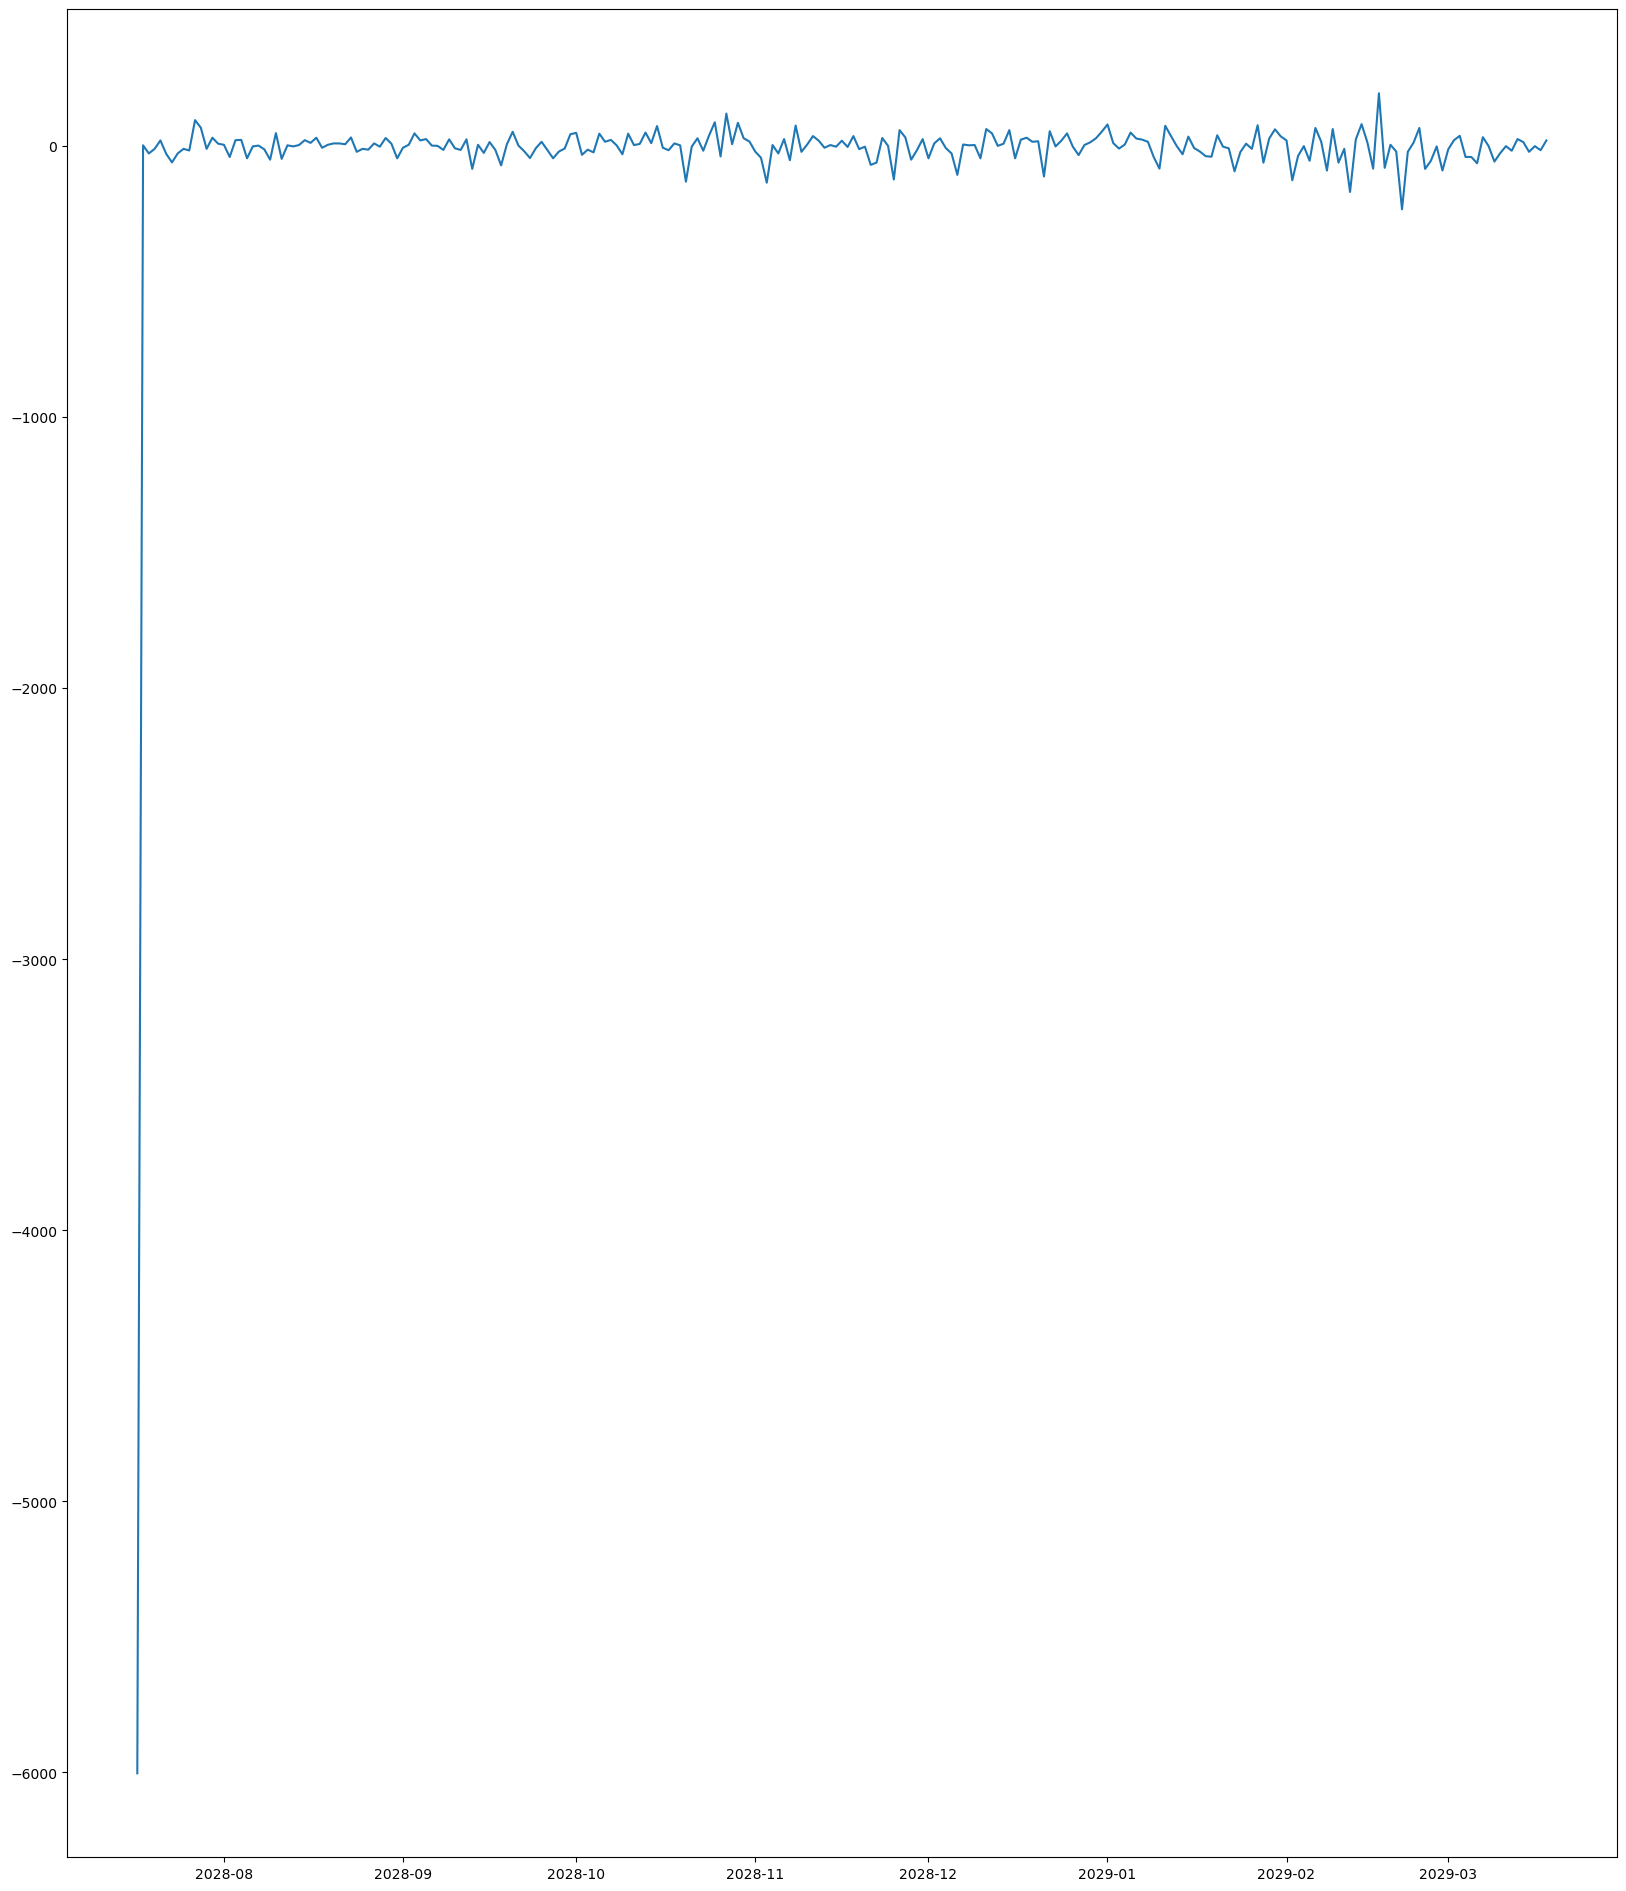

In [49]:
data_train['diff_col'] = data_train['D4224'].diff(periods=1)
data_train= data_train.dropna()

plt.plot(data_train['diff_col'])


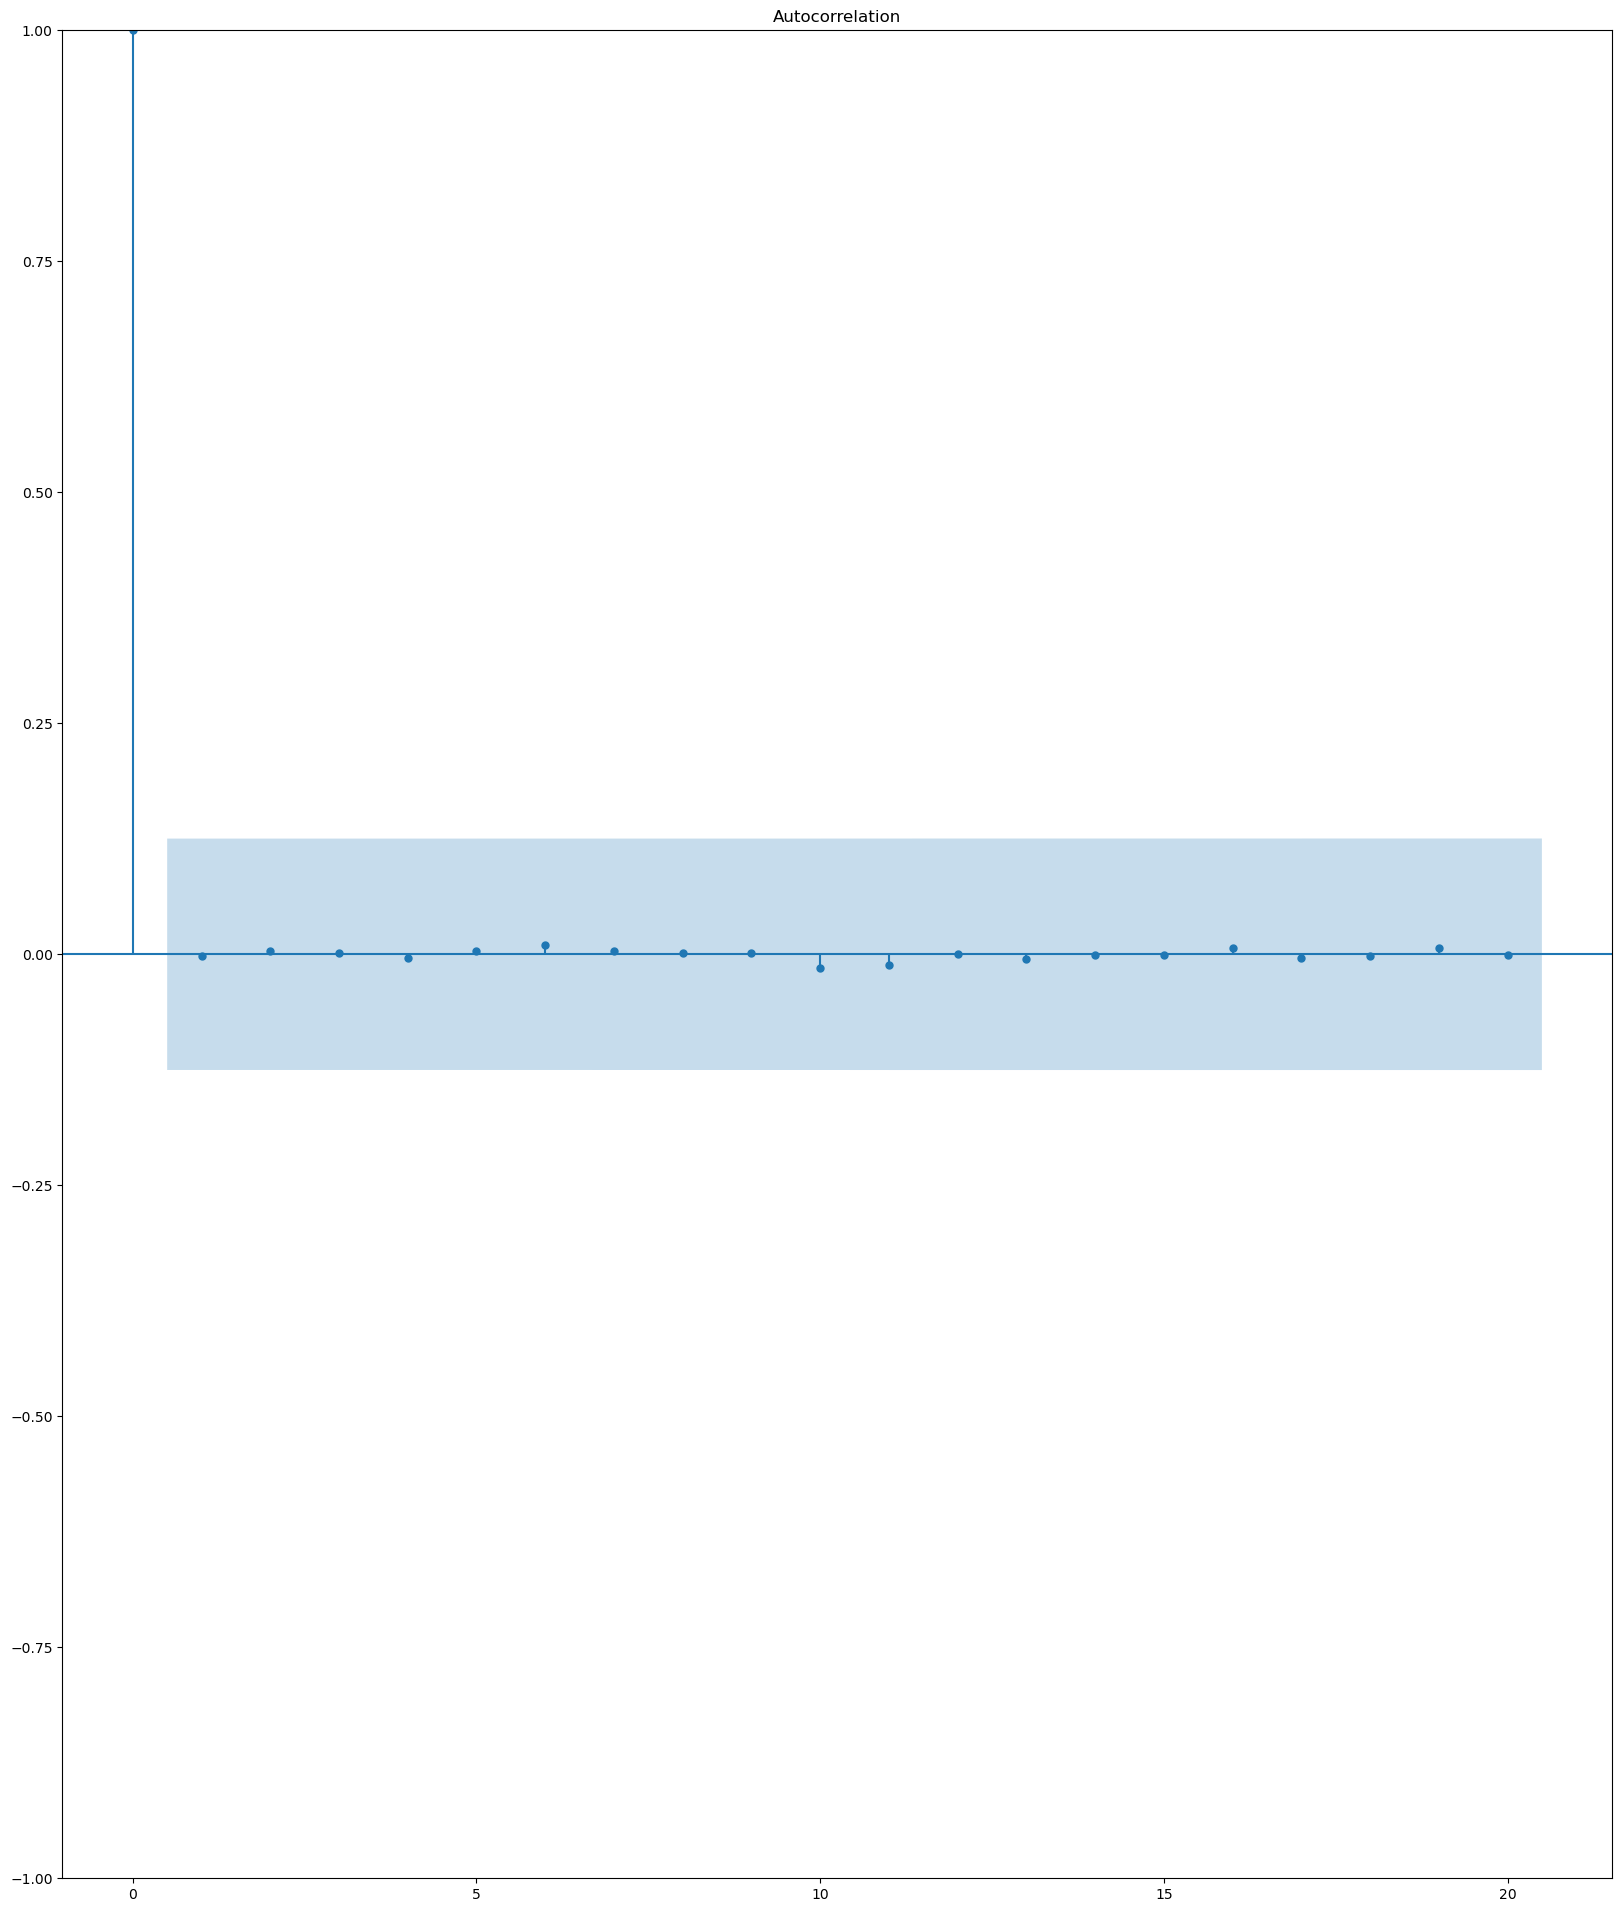

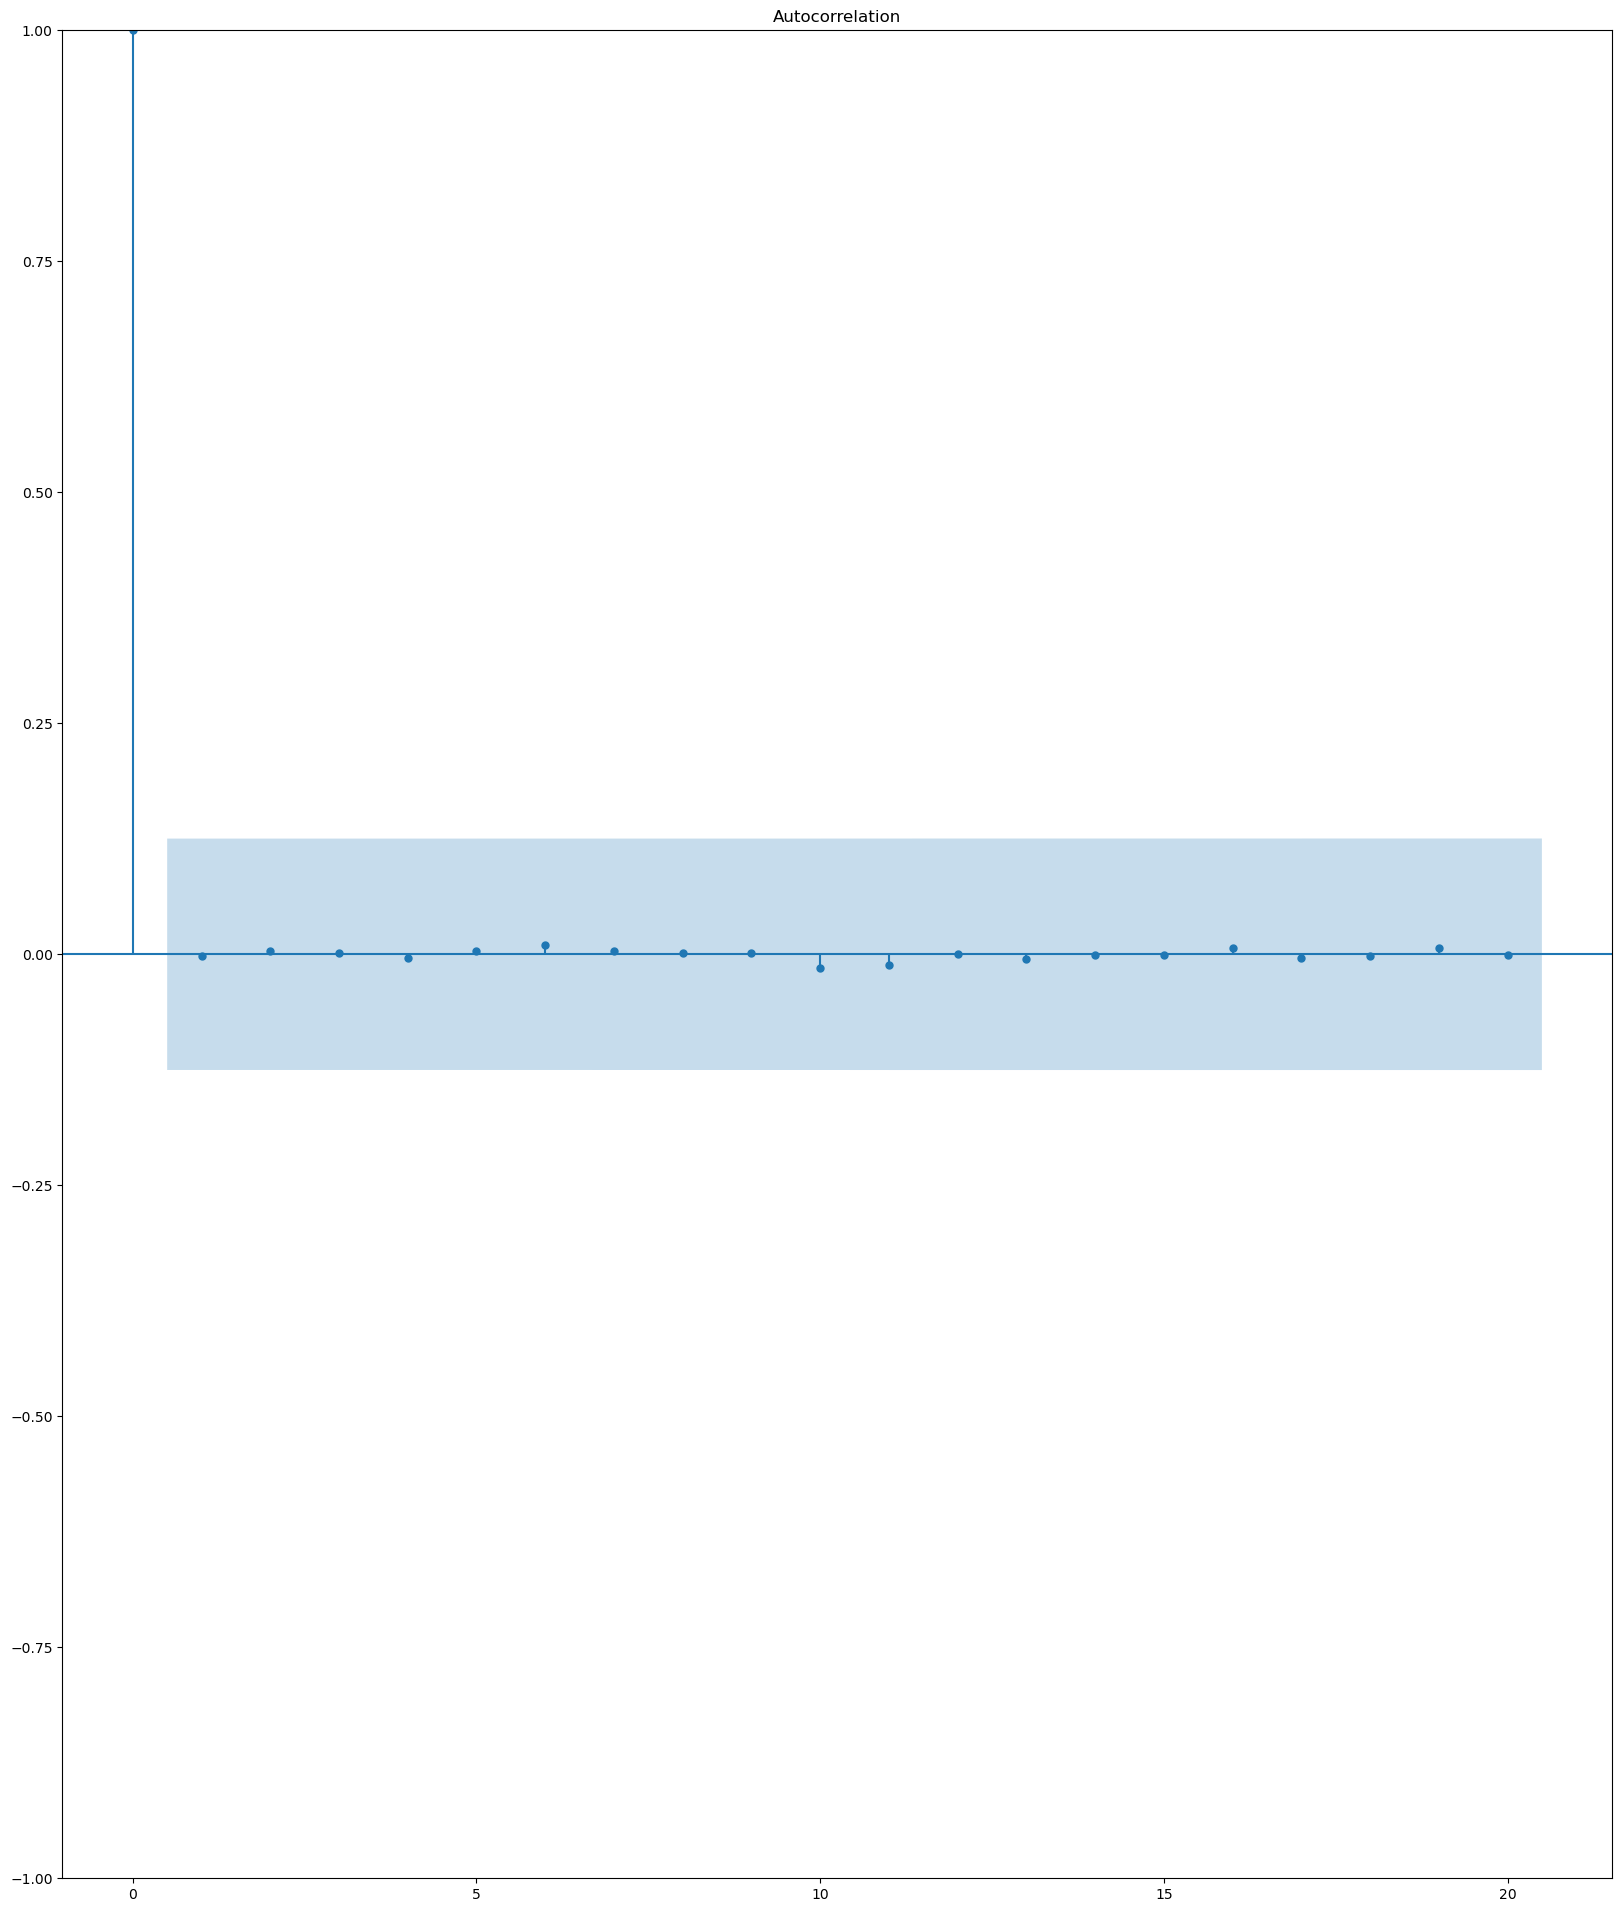

In [50]:
plot_acf(data_train['diff_col'],lags = 20)